<a href="https://colab.research.google.com/github/andizadry/Weather-AUS-TImeSeries-using-LSTM/blob/main/Andi_Sadri_Agung_Membuat_Model_Machine_Learning_dengan_Data_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Submission Belajar Pengembangan Machine Learning**
##**Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series**
Nama : Andi Sadri Agung

Domisili : Makassar, Sulawesi Selatan

Surel : andisadriagung20@gmail.com

Beasiswa : Lintasarta Cloudeka Digischool 2023 (Intermediate)

Dataset : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [6]:
!unzip weatherAUS.csv.zip

Archive:  weatherAUS.csv.zip
replace weatherAUS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
import pandas as pd
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
df.rename(columns = {'Temp3pm':'Temperature'}, inplace = True)
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temperature       3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head()

0   2008-12-01
1   2008-12-02
2   2008-12-03
3   2008-12-04
4   2008-12-05
Name: Date, dtype: datetime64[ns]

In [11]:
df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)
df_clean = df[['Date','Temperature' ]]
df_clean.head()

,Date,Temperature
0,2008-12-01,21.8
1,2008-12-02,24.3
2,2008-12-03,23.2
3,2008-12-04,26.5
4,2008-12-05,29.7


In [12]:
df_clean.describe()

,Temperature
count,145460.000000
mean,21.683390
std,6.850057
min,-5.400000
25%,16.700000
50%,21.400000
75%,26.200000
max,46.700000


Text(0.5, 1.0, 'Temperature Average at 3pm')

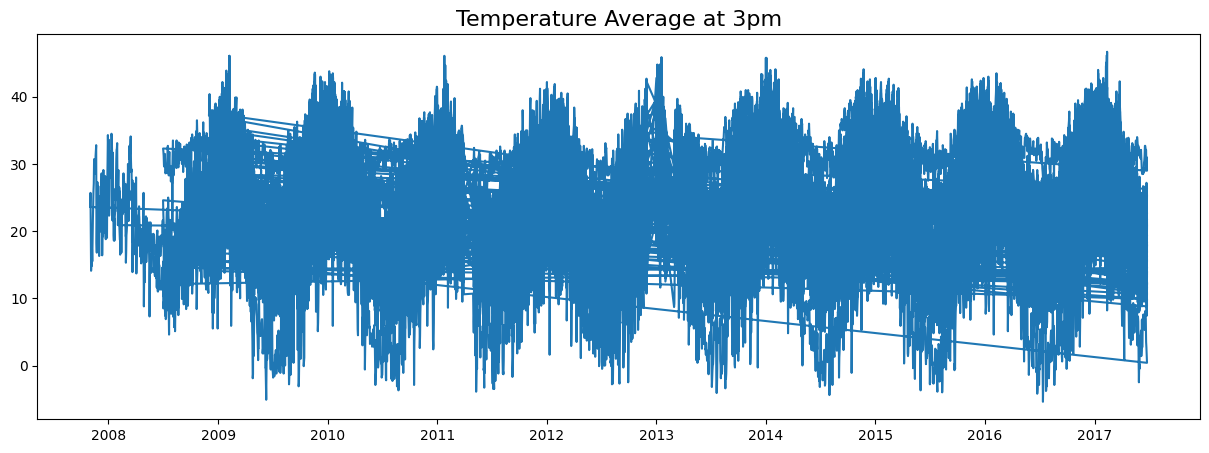

In [17]:
import matplotlib.pyplot as plt
import numpy as np

date = df_clean['Date'].values
temp = df_clean['Temperature'].values
temp_reshaped = np.array(temp).reshape(-1, 1)

plt.figure(figsize=(15,5))
plt.plot(date, temp)
plt.title('Temperature Average at 3pm',
          fontsize=16)

In [14]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
temp_scaled = scaler.fit_transform(temp_reshaped)

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(temp_scaled, date, test_size = 0.2, random_state = 0 , shuffle=False)
print(len(x_train), len(x_test))

116368 29092


In [27]:
from keras.layers import Dense, LSTM
import tensorflow as tf

data_train = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=1000)
data_test = windowed_dataset(x_test, window_size=60, batch_size=32, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True, input_shape = [None, 1]),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, None, 60)          14880     
                                                                 
 dense_6 (Dense)             (None, None, 30)          1830      
                                                                 
 dense_7 (Dense)             (None, None, 10)          310       
                                                                 
 dense_8 (Dense)             (None, None, 1)           11        
                                                                 
Total params: 17031 (133.05 KB)
Trainable params: 17031 (133.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
threshold_mae = (temp_scaled.max() - temp_scaled.min()) * 10/100
threshold_mae

0.1

In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if((logs.get('mae') < threshold_mae) and (logs.get('val_mae') < threshold_mae)):
      print("MAE < 10%")
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(data_train ,epochs=500, validation_data=data_test, verbose=2, callbacks=[callbacks])

Epoch 1/500
1164/1164 - 42s - loss: 0.0491 - mae: 0.2560 - val_loss: 0.0145 - val_mae: 0.1336 - 42s/epoch - 36ms/step
Epoch 2/500
1164/1164 - 39s - loss: 0.0079 - mae: 0.0991 - val_loss: 0.0102 - val_mae: 0.1151 - 39s/epoch - 33ms/step
Epoch 3/500
1164/1164 - 39s - loss: 0.0073 - mae: 0.0960 - val_loss: 0.0097 - val_mae: 0.1125 - 39s/epoch - 34ms/step
Epoch 4/500
1164/1164 - 38s - loss: 0.0072 - mae: 0.0952 - val_loss: 0.0094 - val_mae: 0.1114 - 38s/epoch - 33ms/step
Epoch 5/500
1164/1164 - 38s - loss: 0.0071 - mae: 0.0948 - val_loss: 0.0093 - val_mae: 0.1107 - 38s/epoch - 33ms/step
Epoch 6/500
1164/1164 - 38s - loss: 0.0070 - mae: 0.0944 - val_loss: 0.0092 - val_mae: 0.1100 - 38s/epoch - 32ms/step
Epoch 7/500
1164/1164 - 37s - loss: 0.0070 - mae: 0.0940 - val_loss: 0.0091 - val_mae: 0.1094 - 37s/epoch - 32ms/step
Epoch 8/500
1164/1164 - 40s - loss: 0.0069 - mae: 0.0936 - val_loss: 0.0090 - val_mae: 0.1088 - 40s/epoch - 34ms/step
Epoch 9/500
1164/1164 - 40s - loss: 0.0069 - mae: 0.0932

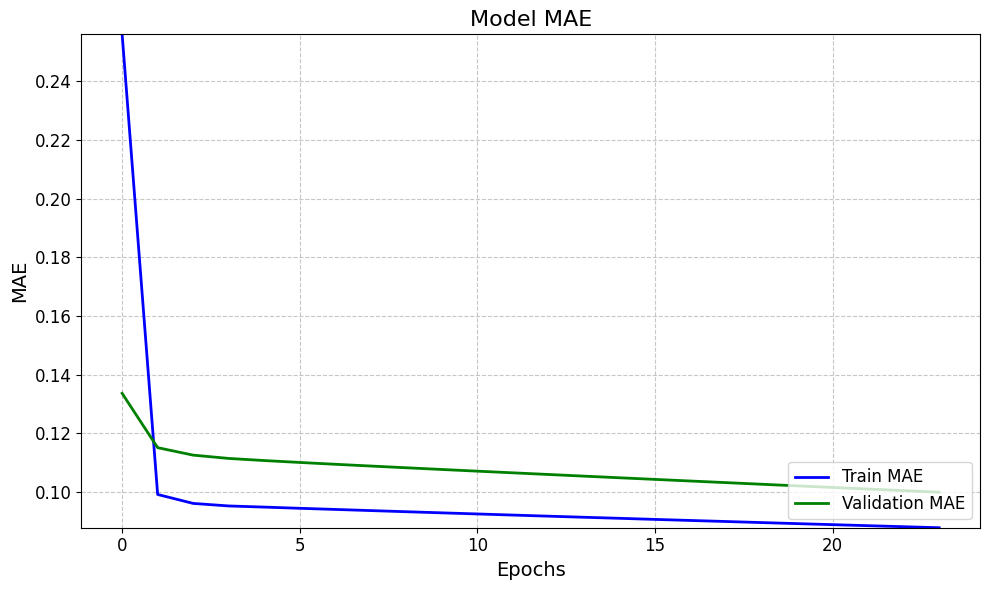

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Train MAE', color='blue', linewidth=2)
plt.plot(history.history['val_mae'], label='Validation MAE', color='green', linewidth=2)
plt.title('Model MAE', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.autoscale(axis='y', tight=True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

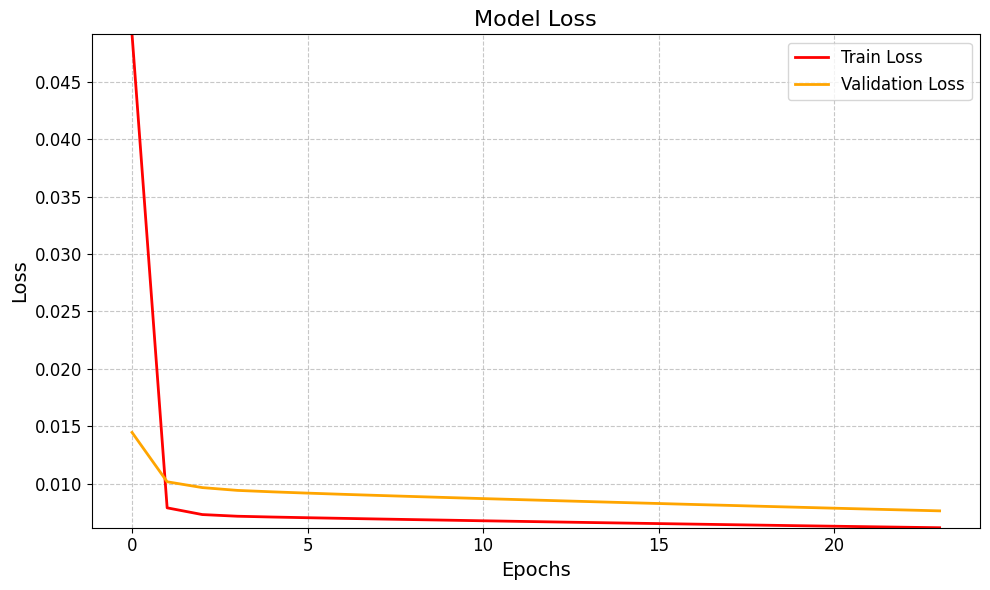

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='red', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.autoscale(axis='y', tight=True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()